In [0]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)

In [0]:
!pwd

/content


In [0]:
file = "/content/blues.00000.wav"

In [0]:
# load audio file with Librosa

sig, sr = librosa.load(file, sr=22050)

In [0]:
print(sig,sig.shape)

[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] (661794,)


Text(0.5, 1.0, 'Waveform')

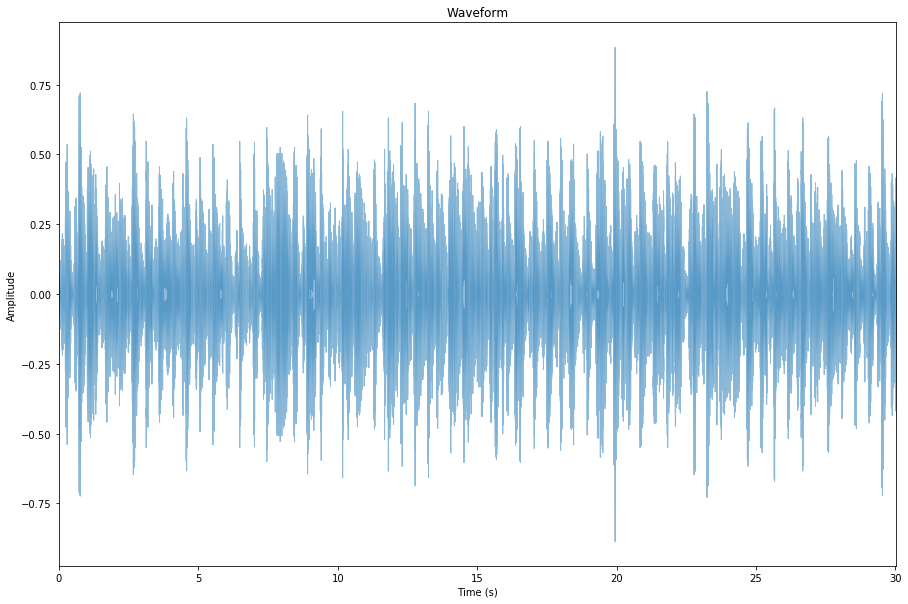

In [0]:
# Wavefrom
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

**단순 푸리에 변환**

In [0]:
# 단순 푸리에 변환
fft = np.fft.fft(sig)

In [0]:
# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft) 

In [0]:
# Frequency 값 만들기
f = np.linspace(0,sr,len(magnitude)) # frequency는 초당 주기의 반복 빈도 수 이므로, 초당 샘플갯수인 sr보다 클 수 없다
                                     # 따라서 0 ~ frequency 사이에서 len(magnitude) 만큼 frequency domain을 만들어 주자

In [0]:
# 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

Text(0.5, 1.0, 'Power spectrum')

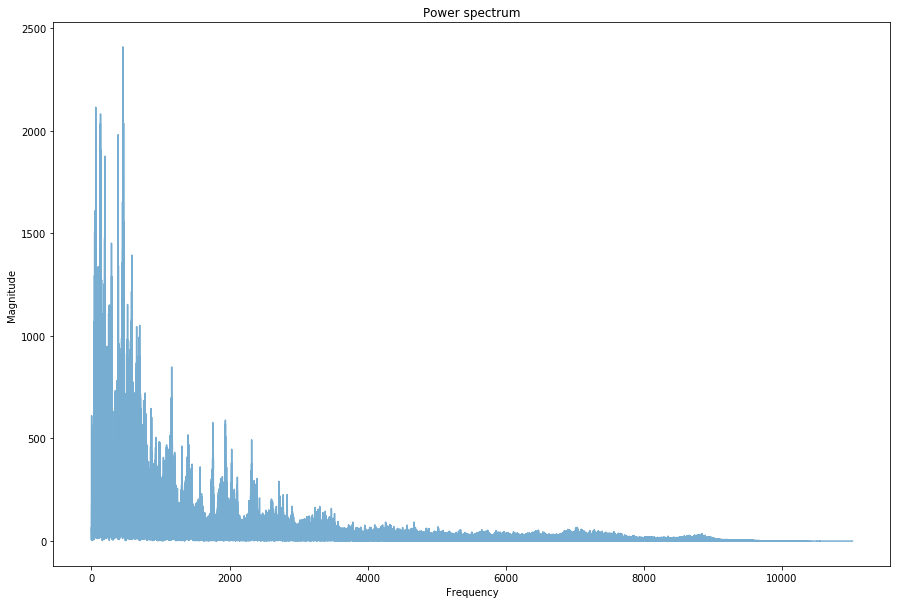

In [0]:
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

**STFT**

In [0]:
# STFT -> spectrogram
hop_length = 512  # 겹치는 frame의 sample 수
n_fft = 2048  # frame 하나당 sample 수

In [0]:
# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

In [0]:
print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))


STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


In [0]:
# perform stft
stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

In [0]:
# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

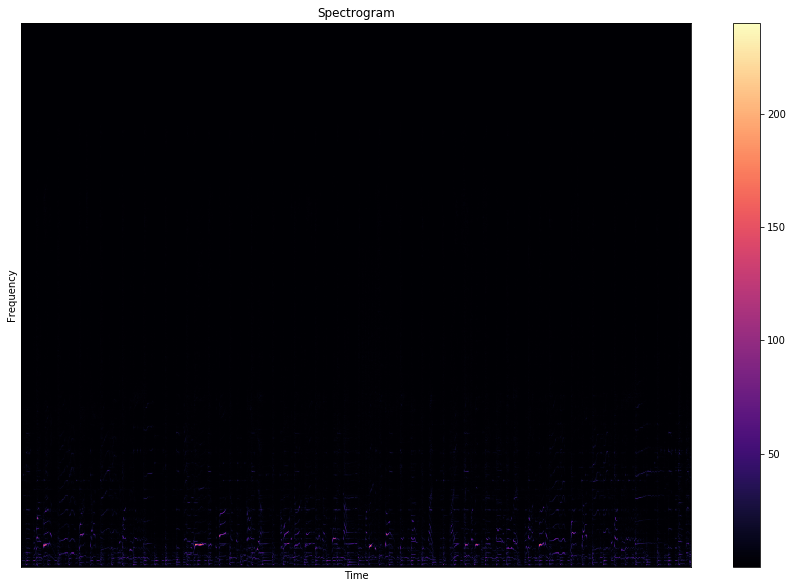

In [0]:
# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [0]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

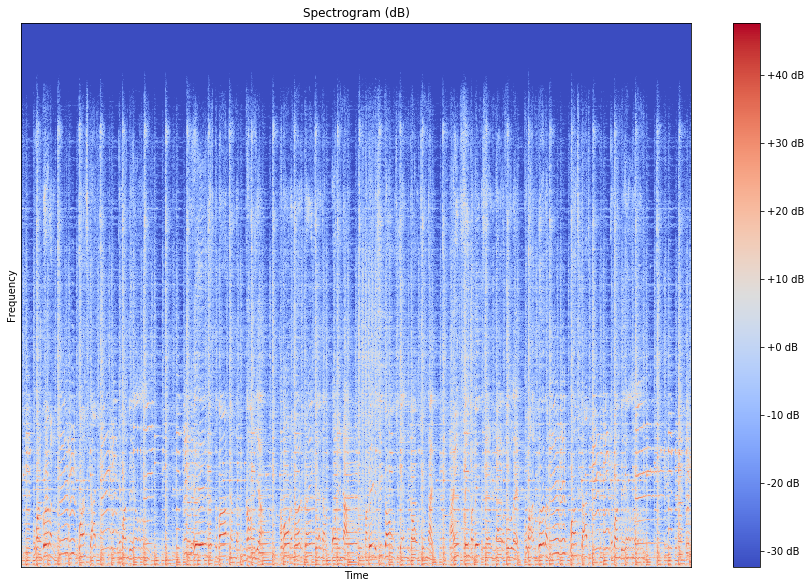

In [0]:
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

**MFCC**

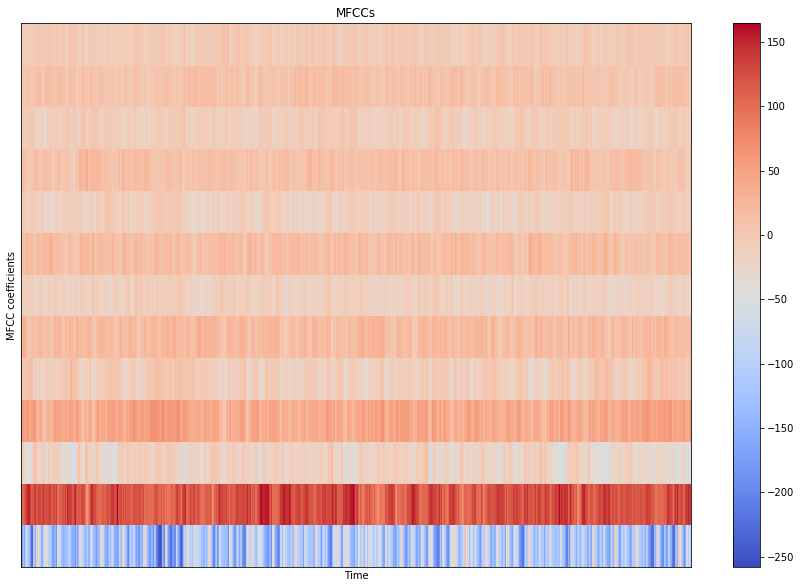

In [0]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(sig, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()
